In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_info = pd.read_csv('lending_club_info.csv', index_col = 'LoanStatNew')

In [3]:
print(df_info.loc['term']['Description'])

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [4]:
def feat_info(col):
    print(df_info.loc[col]['Description'])

In [5]:
df = pd.read_csv('lending_club_loan_two.csv')

In [6]:
df_copy = df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [10]:
df['emp_title'].nunique()

173105

In [11]:
df.drop('emp_title', axis = 1, inplace = True)

In [12]:
df['purpose'].nunique()

14

In [13]:
feat_info('title')

The loan title provided by the borrower


In [14]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [15]:
df[['title', 'purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [16]:
df.drop('title', axis = 1, inplace = True)

In [17]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [18]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [19]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

In [20]:
df.drop('grade', axis = 1, inplace = True)

<Axes: xlabel='count', ylabel='emp_length'>

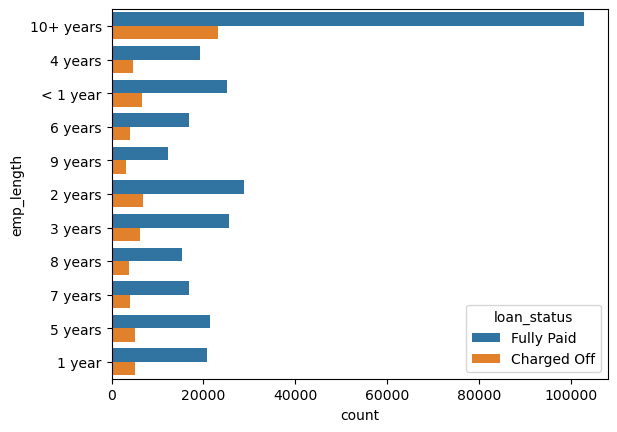

In [21]:
sns.countplot(y = 'emp_length', data = df, hue = 'loan_status')

In [22]:
emp_fp = df[df['loan_status'] == 'Fully Paid']['emp_length'].value_counts()
emp_fp

10+ years    102826
2 years       28903
3 years       25483
< 1 year      25162
5 years       21403
1 year        20728
4 years       19344
6 years       16898
7 years       16764
8 years       15339
9 years       12244
Name: emp_length, dtype: int64

In [23]:
emp_co = df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts()
emp_co

10+ years    23215
2 years       6924
< 1 year      6563
3 years       6182
1 year        5154
5 years       5092
4 years       4608
7 years       4055
6 years       3943
8 years       3829
9 years       3070
Name: emp_length, dtype: int64

In [24]:
emp_len = emp_co/emp_fp * 100

<Axes: >

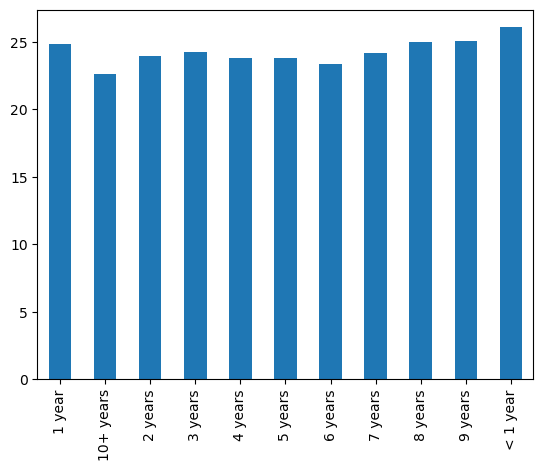

In [25]:
emp_len.plot(kind = 'bar')

In [26]:
df.drop('emp_length', axis = 1, inplace = True)

In [27]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [28]:
df['issue_year'] = df['issue_d'].apply(lambda x: int(x[-4:]))
df['issue_year'].value_counts()

2014    102860
2013     97662
2015     94264
2012     41202
2016     28088
2011     17435
2010      9258
2009      3826
2008      1240
2007       195
Name: issue_year, dtype: int64

In [29]:
df.drop('issue_d', axis = 1,inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
issue_year                  0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [33]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Fully Paid,vacation,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",2015
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",2015
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Fully Paid,credit_card,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",2015
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Fully Paid,credit_card,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",2014
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Charged Off,credit_card,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",2013


In [34]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df['earliest_cr_year'].value_counts()

2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_year, Length: 65, dtype: int64

In [35]:
df.drop('earliest_cr_line', axis = 1, inplace = True)

In [36]:
df.corr(numeric_only = True)['mort_acc'].sort_values()

earliest_cr_year       -0.291298
int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
issue_year              0.011220
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
term                    0.096220
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [37]:
df.groupby('total_acc')['mort_acc'].mean()[4.0]

0.0667433831990794

In [38]:
total_acc_mean = df.groupby('total_acc')['mort_acc'].mean()

In [39]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [40]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [41]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
issue_year                0
earliest_cr_year          0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  float64
 13  revol_bal             396030 non-null  float64
 14  revol_util            395754 non-null  float64
 15  

In [43]:
df['zip_code'] = df['address'].apply(lambda x: int(x[-5:]))

In [44]:
df['zip_code']

0         22690
1          5113
2          5113
3           813
4         11650
          ...  
396025    30723
396026     5113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 396030, dtype: int64

In [45]:
df.drop('address', axis = 1, inplace = True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  float64
 13  revol_bal             396030 non-null  float64
 14  revol_util            395754 non-null  float64
 15  

In [47]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'issue_year', 'earliest_cr_year', 'zip_code'],
      dtype='object')

In [48]:
df = df[['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'issue_year', 'earliest_cr_year', 'zip_code']]

In [49]:
df.head()

,loan_status,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_year,earliest_cr_year,zip_code
0,Fully Paid,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,2015,1990,22690
1,Fully Paid,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,2015,2004,5113
2,Fully Paid,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,2015,2007,5113
3,Fully Paid,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,2014,2006,813
4,Charged Off,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,2013,1999,11650


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_status           396030 non-null  object 
 1   loan_amnt             396030 non-null  float64
 2   term                  396030 non-null  int64  
 3   int_rate              396030 non-null  float64
 4   installment           396030 non-null  float64
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  float64
 13  revol_bal             396030 non-null  float64
 14  revol_util            395754 non-null  float64
 15  

In [51]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [52]:
df_dummies = pd.get_dummies(df[['sub_grade', 'home_ownership', 'verification_status', 'purpose',\
                                'initial_list_status', 'application_type']], drop_first = True)

#df = df.drop(['sub_grade', 'home_ownership', 'verification_status', 'purpose',  'initial_list_status','application_type'], axis = 1, inplace = True)

#df = pd.concat([df, df_dummies], axis = 1 )

In [53]:
df.head()

,loan_status,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_year,earliest_cr_year,zip_code
0,Fully Paid,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,2015,1990,22690
1,Fully Paid,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,2015,2004,5113
2,Fully Paid,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,2015,2007,5113
3,Fully Paid,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,2014,2006,813
4,Charged Off,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,2013,1999,11650


In [54]:
df_concat = pd.concat([df, df_dummies], axis = 1)

In [55]:
df_concat.columns

Index(['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'issue_year', 'earliest_cr_year', 'zip_code',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'home_ownership_OTHER

In [56]:
df_concat.shape

(396030, 78)

In [57]:
df_concat.head()

,loan_status,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,Fully Paid,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,...,0,0,0,0,0,1,0,1,1,0
1,Fully Paid,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,...,0,0,0,0,0,0,0,0,1,0
2,Fully Paid,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,...,0,0,0,0,0,0,0,0,1,0
3,Fully Paid,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,...,0,0,0,0,0,0,0,0,1,0
4,Charged Off,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,...,0,0,0,0,0,0,0,0,1,0


In [58]:
df_concat.drop(['sub_grade', 'home_ownership', 'verification_status', 'purpose',\
                                'initial_list_status', 'application_type'], axis = 1, inplace=True)

In [59]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 72 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_status                          396030 non-null  object 
 1   loan_amnt                            396030 non-null  float64
 2   term                                 396030 non-null  int64  
 3   int_rate                             396030 non-null  float64
 4   installment                          396030 non-null  float64
 5   annual_inc                           396030 non-null  float64
 6   dti                                  396030 non-null  float64
 7   open_acc                             396030 non-null  float64
 8   pub_rec                              396030 non-null  float64
 9   revol_bal                            396030 non-null  float64
 10  revol_util                           395754 non-null  float64
 11  total_acc    

In [60]:
zip_dummies = pd.get_dummies(df_concat['zip_code'], drop_first = True)

In [61]:
df_concat = pd.concat([df_concat, zip_dummies], axis = 1)

In [62]:
df_concat.drop('zip_code', axis = 1, inplace = True)

In [63]:
df_concat = df_concat.dropna()

In [64]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_status                          395219 non-null  object 
 1   loan_amnt                            395219 non-null  float64
 2   term                                 395219 non-null  int64  
 3   int_rate                             395219 non-null  float64
 4   installment                          395219 non-null  float64
 5   annual_inc                           395219 non-null  float64
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [65]:
df_concat.drop('issue_year', axis = 1, inplace = True)

In [66]:
df_concat.shape

(395219, 79)

In [81]:
X = df_concat.drop('loan_status', axis = 1).values
y = pd.get_dummies(df_concat['loan_status'], drop_first = True)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [101]:
model = Sequential()

model.add(Dense(78))
model.add(Dropout(0.2))

model.add(Dense(39))
model.add(Dropout(0.2))

model.add(Dense(19))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [102]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 256)

Epoch 1/20
1035/1035 [==============================] - 6s 5ms/step - loss: 0.3161 - accuracy: 0.8694 - val_loss: 0.2624 - val_accuracy: 0.8890
Epoch 2/20
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2711 - accuracy: 0.8859 - val_loss: 0.2609 - val_accuracy: 0.8888
Epoch 3/20
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2664 - accuracy: 0.8870 - val_loss: 0.2596 - val_accuracy: 0.8888
Epoch 4/20
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2641 - accuracy: 0.8879 - val_loss: 0.2595 - val_accuracy: 0.8892
Epoch 5/20
1035/1035 [==============================] - 5s 4ms/step - loss: 0.2629 - accuracy: 0.8875 - val_loss: 0.2597 - val_accuracy: 0.8883
Epoch 6/20
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2619 - accuracy: 0.8879 - val_loss: 0.2596 - val_accuracy: 0.8886
Epoch 7/20
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2615 - accuracy: 0.8879 - val_loss: 0.2586 - val_accuracy:

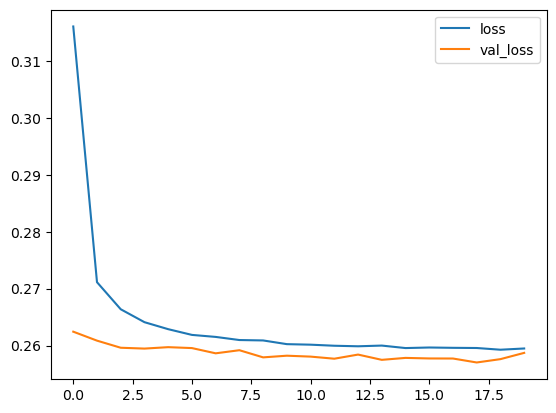

In [104]:
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.legend()

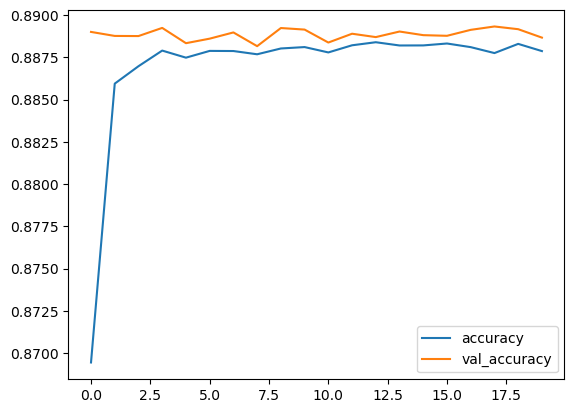

In [105]:
plt.plot(model.history.history['accuracy'], label = 'accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()